In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784', version=1, data_home="./datasets")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#idx=0
idx = np.random.randint(0, 70000)
rand_digit = X[idx]
rand_digit_image = rand_digit.reshape(28, 28)

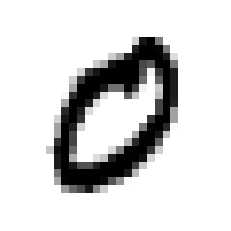

In [6]:
plt.imshow(rand_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show();

In [7]:
rand_target = y[idx]
rand_target

'0'

In [8]:
y = y.astype(np.uint8)

In [9]:
y_train_rand = (y_train == rand_target)
y_test_rand = (y_test == rand_target)

In [10]:
sgd_clf = SGDClassifier(random_state=4)
sgd_clf.fit(X_train, y_train_rand)

SGDClassifier(random_state=4)

In [11]:
sgd_clf.predict([rand_digit])

array([ True])

In [14]:
cross_val_score(sgd_clf, X_train, y_train_rand, cv=3, scoring="accuracy")

array([0.986  , 0.9867 , 0.98665])

In [16]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_rand, cv=3)

In [18]:
confusion_matrix(y_train_rand, y_train_predict)

array([[53536,   541],
       [  272,  5651]], dtype=int64)